In [1]:
#Import "classic" libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import "specific" libraries

import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

import math
from math import sqrt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
#Import datasets

df_classification = pd.read_csv('IT_Company_System_Issues_Classification.csv')
df_time_series = pd.read_csv('IT_Company_Time_Series.csv')
df_retail_list = pd.read_csv('IT_Retail_List.csv')

# Data Exploring and Preprocessing

In [3]:
df_classification

,Unnamed: 0,Issue_ID,Issue_Type,System_Component,Customer_Impact,Time_to_Resolve_hrs,Reported_By,Priority,Previous_Occurrences,Issue_Reported_Month,Resolved
0,0,8544,Hardware,Component_D,High,43.117583,Automated_System,High,2,Jul,True
1,1,6569,Server,Component_B,Low,71.695013,Customer,Low,6,May,False
2,2,3990,Server,Component_D,Medium,31.621253,Automated_System,Medium,4,Mar,False
3,3,3504,Server,Component_C,Low,66.329435,Automated_System,Medium,0,Sep,True
4,4,1587,Server,Component_D,Medium,25.168704,Automated_System,Medium,2,Jun,False
...,...,...,...,...,...,...,...,...,...,...,...
995,995,8162,Network,Component_C,Medium,69.735378,Automated_System,High,0,Mar,False
996,996,7241,Hardware,Component_D,High,32.881160,Customer,Medium,1,Jan,False
997,997,9399,Server,Component_A,Low,68.118630,Customer,Medium,7,Feb,False
998,998,6633,Server,Component_C,Medium,48.892633,Customer,Urgent,8,May,True


In [4]:
df_time_series

,Date,Software_1,Software_2,Software_3,Software_4,Software_5,Software_6,Software_7,Software_8,Software_9,Software_10,Software_11,Software_12,Software_13,Software_14,Software_15
0,2018-01-31,104,97,63,72,50,95,101,63,134,101,72,134,118,95,114
1,2018-02-28,89,128,61,95,52,97,113,73,144,117,68,110,115,79,131
2,2018-03-31,114,101,75,85,45,96,120,75,142,109,69,110,117,74,84
3,2018-04-30,107,94,44,85,35,99,112,75,135,98,59,137,101,72,98
4,2018-05-31,92,104,66,97,48,81,108,81,138,89,64,124,107,83,122
5,2018-06-30,91,79,74,87,41,104,99,73,114,116,61,117,122,80,99
6,2018-07-31,102,117,87,75,52,91,107,72,137,104,94,113,116,60,104
7,2018-08-31,95,89,74,69,50,88,115,69,141,94,73,115,108,86,86
8,2018-09-30,88,106,63,76,57,103,118,63,129,96,80,100,102,80,76
9,2018-10-31,97,93,55,96,60,90,102,74,122,104,74,115,101,66,122


In [5]:
df_retail_list

,InvoiceNo,ItemCode,Most popular item of the day,Quantity,Date,UnitPrice,CustomerID
0,1.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2018,2.55,43009.0
1,2.0,71053,WHITE METAL LANTERN,6.0,02/12/2018,3.39,79874.0
2,3.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,03/12/2018,2.75,45061.0
3,4.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,04/12/2018,3.39,47110.0
4,5.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,05/12/2018,3.39,77834.0
...,...,...,...,...,...,...,...
1623,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1626,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Checking for missing values

df_classification.isnull().sum()

Unnamed: 0              0
Issue_ID                0
Issue_Type              0
System_Component        0
Customer_Impact         0
Time_to_Resolve_hrs     0
Reported_By             0
Priority                0
Previous_Occurrences    0
Issue_Reported_Month    0
Resolved                0
dtype: int64

In [7]:
df_time_series.isnull().sum()

Date           0
Software_1     0
Software_2     0
Software_3     0
Software_4     0
Software_5     0
Software_6     0
Software_7     0
Software_8     0
Software_9     0
Software_10    0
Software_11    0
Software_12    0
Software_13    0
Software_14    0
Software_15    0
dtype: int64

In [8]:
df_retail_list.isnull().sum()

InvoiceNo                       628
ItemCode                        628
Most popular item of the day    629
Quantity                        628
Date                            628
UnitPrice                       628
CustomerID                      628
dtype: int64

In [9]:
#Checking data types

df_classification.dtypes

Unnamed: 0                int64
Issue_ID                  int64
Issue_Type               object
System_Component         object
Customer_Impact          object
Time_to_Resolve_hrs     float64
Reported_By              object
Priority                 object
Previous_Occurrences      int64
Issue_Reported_Month     object
Resolved                   bool
dtype: object

In [10]:
df_time_series.dtypes

Date           object
Software_1      int64
Software_2      int64
Software_3      int64
Software_4      int64
Software_5      int64
Software_6      int64
Software_7      int64
Software_8      int64
Software_9      int64
Software_10     int64
Software_11     int64
Software_12     int64
Software_13     int64
Software_14     int64
Software_15     int64
dtype: object

In [11]:
df_retail_list.dtypes

InvoiceNo                       float64
ItemCode                         object
Most popular item of the day     object
Quantity                        float64
Date                             object
UnitPrice                       float64
CustomerID                      float64
dtype: object

In [12]:
#We convert the date into datetime format

df_time_series['Date'] = pd.to_datetime(df_time_series['Date'])

In [13]:
df_time_series.dtypes

Date           datetime64[ns]
Software_1              int64
Software_2              int64
Software_3              int64
Software_4              int64
Software_5              int64
Software_6              int64
Software_7              int64
Software_8              int64
Software_9              int64
Software_10             int64
Software_11             int64
Software_12             int64
Software_13             int64
Software_14             int64
Software_15             int64
dtype: object

In [14]:
selected_columns = df_time_series[['Software_1', 'Software_2', 'Software_3', 'Software_4', 'Software_5', 'Software_6', 'Software_7', 'Software_8', 'Software_9', 'Software_10', 'Software_11', 'Software_12', 'Software_13', 'Software_14', 'Software_15']]

In [15]:
#Determining top software products

column_sums = selected_columns.sum()
sorted_column_sums = column_sums.sort_values(ascending=False)
print(sorted_column_sums)

Software_9     7691
Software_12    7365
Software_13    6970
Software_7     6586
Software_15    6260
Software_2     6137
Software_1     5998
Software_10    5653
Software_6     5394
Software_4     5287
Software_14    4724
Software_11    4266
Software_8     4068
Software_3     3847
Software_5     3113
dtype: int64


In [16]:
df_time_series.describe()

,Software_1,Software_2,Software_3,Software_4,Software_5,Software_6,Software_7,Software_8,Software_9,Software_10,Software_11,Software_12,Software_13,Software_14,Software_15
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,99.966667,102.283333,64.116667,88.116667,51.883333,89.900000,109.766667,67.800000,128.183333,94.216667,71.100000,122.750000,116.166667,78.733333,104.333333
std,9.596904,10.551073,8.574878,10.764177,7.309366,8.482684,8.803633,9.136999,11.985149,8.592649,8.274322,11.194165,10.371353,7.804533,12.743449
min,81.000000,79.000000,44.000000,66.000000,35.000000,71.000000,93.000000,48.000000,89.000000,70.000000,57.000000,100.000000,95.000000,60.000000,72.000000
25%,92.000000,94.750000,58.000000,82.500000,47.000000,84.000000,102.750000,62.750000,121.750000,89.750000,65.000000,115.000000,108.750000,72.750000,96.000000
50%,101.000000,103.000000,65.000000,88.000000,51.000000,90.000000,111.500000,68.500000,129.000000,93.000000,71.000000,121.000000,116.500000,79.000000,105.000000
75%,107.000000,107.750000,69.000000,94.250000,55.500000,96.000000,116.250000,74.000000,136.000000,98.000000,77.000000,129.000000,122.250000,84.000000,116.000000
max,118.000000,128.000000,87.000000,114.000000,73.000000,106.000000,126.000000,90.000000,153.000000,117.000000,94.000000,161.000000,149.000000,95.000000,131.000000


# Time Series

In [17]:
#We use the dataset df_time_series which has the software sales

#We set the date column as index to conduct the time series models

df_time_series.set_index('Date', inplace = True)

In [18]:
#Ducky Fuller Test to check the stationarity/seasonality of the data

#H0: the data is not stationary
#H1: the data is stationary
#alpha = 0.05

result = adfuller(df_time_series['Software_9'])
print('ADF statistics:', result[0])
print('p-value:', result[1])

ADF statistics: -7.015455720341245
p-value: 6.751118029685305e-10


In [19]:
#H0: the data is not stationary
#H1: the data is stationary
#alpha = 0.05

result = adfuller(df_time_series['Software_12'])
print('ADF statistics:', result[0])
print('p-value:', result[1])

ADF statistics: -3.6081304177943263
p-value: 0.005607480526198153


In [20]:
#H0: the data is not stationary
#H1: the data is stationary
#alpha = 0.05

result = adfuller(df_time_series['Software_13'])
print('ADF statistics:', result[0])
print('p-value:', result[1])

ADF statistics: -5.566843293188857
p-value: 1.498042470719463e-06


We reject the hypothesis for Software_9, Software_12, and Software_13 
as the p-value of each is less then our alpha of 0.05

Alternative hypothesis is accepted

Software_9, Software_12, Software_13 data is stationary

In [21]:
#Creating new dataframes, picking the variable we want to work with

df_Software_9 = df_time_series[['Software_9']]
df_Software_12 = df_time_series[['Software_12']]
df_Software_13 = df_time_series[['Software_13']]

# #Software_9 forecast

In [22]:
#We start with ARIMA model

#Split the data into training and test set

train_data = df_Software_9[:int(0.8*len(df_Software_9))]
test_data = df_Software_9[int(0.8*len(df_Software_9)):]

In [23]:
#Building the ARIMA model

arima_model_9 = ARIMA(train_data['Software_9'], order = (1, 1, 1))
arima_fit_9 = arima_model_9.fit()

/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [24]:
#Forecast for testing set

arima_forcast_9 = arima_fit_9.forecast(steps = len(test_data))

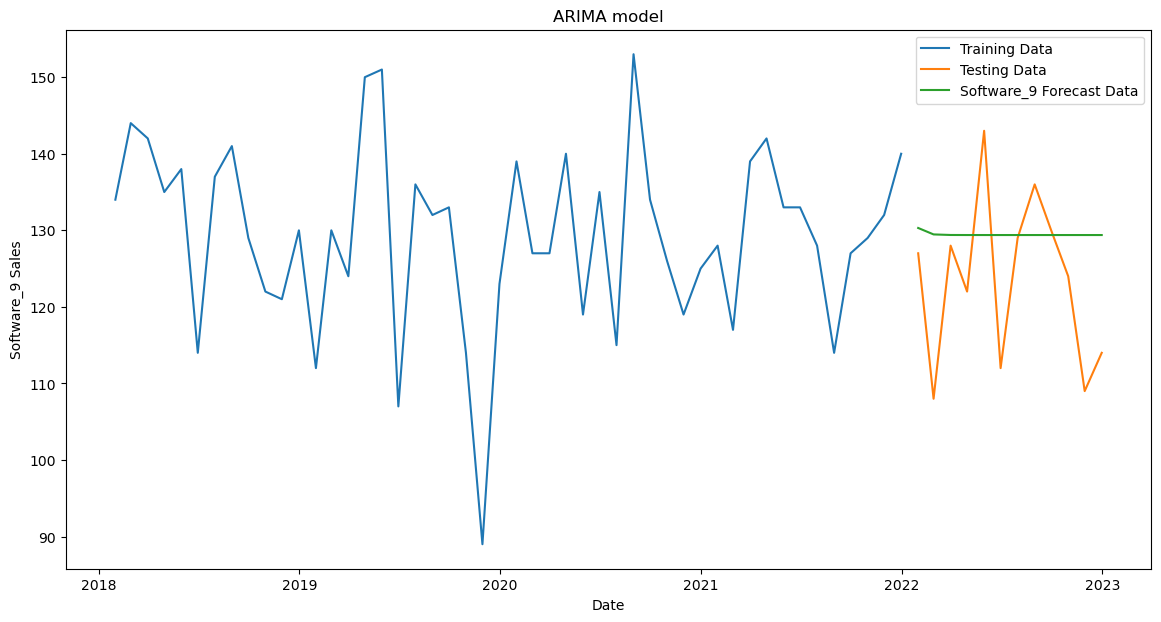

In [25]:
#Visualisation to check the forecasting

plt.figure(figsize = (14, 7))
plt.plot(train_data.index, train_data['Software_9'], label = 'Training Data')
plt.plot(test_data.index, test_data['Software_9'], label = 'Testing Data')
plt.plot(test_data.index, arima_forcast_9, label = 'Software_9 Forecast Data')
plt.xlabel('Date')
plt.ylabel('Software_9 Sales')
plt.title('ARIMA model')
plt.legend()
plt.show()

In [26]:
#Now we check what will happen in the next 12 months

forecast_12_steps = 12
future_arima_forecast_9 = arima_fit_9.get_forecast(steps = forecast_12_steps)
future_arima_df_9 = pd.DataFrame({
    'Forecast': future_arima_forecast_9.predicted_mean
})
future_arima_df_9.index = pd.date_range(start = test_data.index[-1] + pd.Timedelta(days = 30), periods = forecast_12_steps, freq = 'M')

future_arima_df_9

,Forecast
2023-01-31,130.305472
2023-02-28,129.463877
2023-03-31,129.390817
2023-04-30,129.384474
2023-05-31,129.383924
2023-06-30,129.383876
2023-07-31,129.383872
2023-08-31,129.383871
2023-09-30,129.383871
2023-10-31,129.383871


In [27]:
#We move on with SARIMAX model

#We can start building the model

sarimax_model_9 = SARIMAX(train_data['Software_9'],
                       order = (1, 1, 1),
                       seasonal_order = (1, 1, 1, 12))
sarimax_9_fit = sarimax_model_9.fit(disp = False)

/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [28]:
#Forecasting using SARIMAX

sarimax_forecast_9 = sarimax_9_fit.forecast(steps = len(test_data))

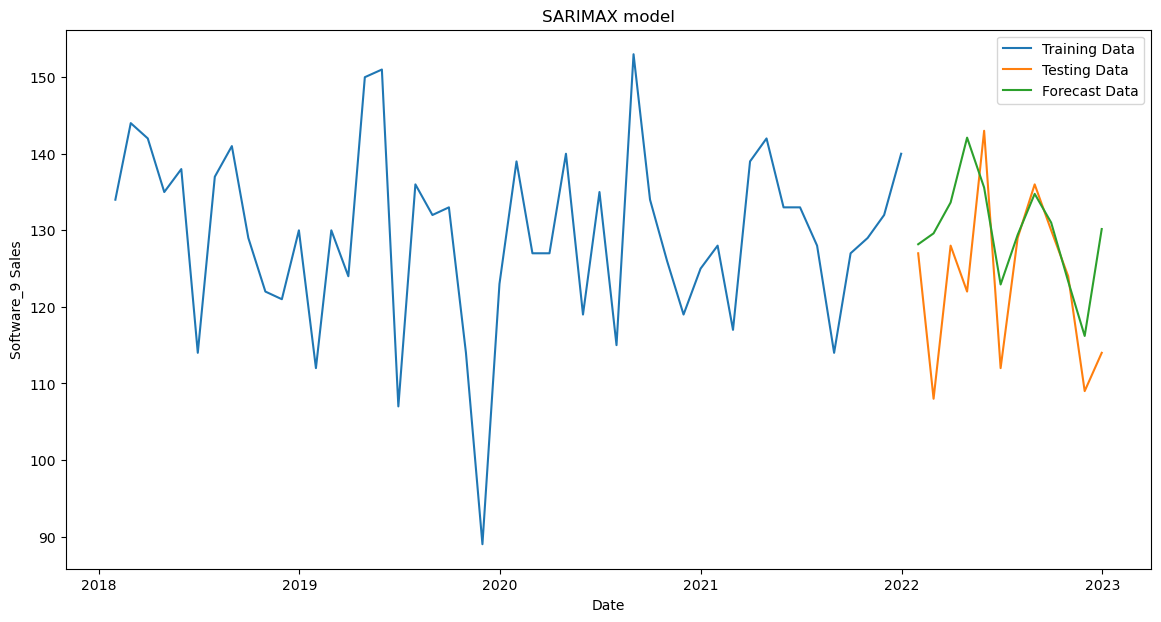

In [29]:
#Visualisation to check the forecasting

plt.figure(figsize = (14, 7))
plt.plot(train_data.index, train_data['Software_9'], label = 'Training Data')
plt.plot(test_data.index, test_data['Software_9'], label = 'Testing Data')
plt.plot(test_data.index, sarimax_forecast_9, label = 'Forecast Data')
plt.xlabel('Date')
plt.ylabel('Software_9 Sales')
plt.title('SARIMAX model')
plt.legend()
plt.show()

In [30]:
#Now we check what will happen in the next 12 months

forecast_12_steps = 12
future_sarimax_forecast_9 = sarimax_9_fit.get_forecast(steps = forecast_12_steps)
future_sarimax_9_df = pd.DataFrame({
    'Forecast': future_sarimax_forecast_9.predicted_mean
})
future_sarimax_9_df.index = pd.date_range(start = test_data.index[-1] + pd.Timedelta(days = 30), periods = forecast_12_steps, freq = 'M')

future_sarimax_9_df

,Forecast
2023-01-31,128.180297
2023-02-28,129.602939
2023-03-31,133.631256
2023-04-30,142.102749
2023-05-31,135.583068
2023-06-30,122.925104
2023-07-31,129.405212
2023-08-31,134.763890
2023-09-30,131.008395
2023-10-31,123.329201


In [31]:
#We calculate the MAPE

#ARIMA

non_zero_test_arima_9 = test_data['Software_9'] !=0
filtered_test_arima_9 = test_data['Software_9'][non_zero_test_arima_9]
filtered_forecast_arima_9 = arima_forcast_9[non_zero_test_arima_9]
arima_mape_9 = np.mean(np.abs((filtered_test_arima_9 - filtered_forecast_arima_9)/filtered_test_arima_9))*100
arima_mape_9

8.069395182340466

In [32]:
#SARIMAX

non_zero_test_sarimax_9 = test_data['Software_9'] !=0
filtered_test_sarimax_9 = test_data['Software_9'][non_zero_test_sarimax_9]
filtered_forecast_sarimax_9 = sarimax_forecast_9[non_zero_test_sarimax_9]
sarimax_mape_9 = np.mean(np.abs((filtered_test_sarimax_9 - filtered_forecast_sarimax_9)/filtered_test_sarimax_9))*100
sarimax_mape_9

6.673315020169214

# #Software_12 forecast

In [33]:
#We start with ARIMA model

#Split the data into training and test set

train_data = df_Software_12[:int(0.8*len(df_Software_12))]
test_data = df_Software_12[int(0.8*len(df_Software_12)):]

In [34]:
#Building the ARIMA model

arima_model_12 = ARIMA(train_data['Software_12'], order = (1, 1, 1))
arima_fit_12 = arima_model_12.fit()

/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [35]:
#Forecast for testing set

arima_forcast_12 = arima_fit_12.forecast(steps = len(test_data))

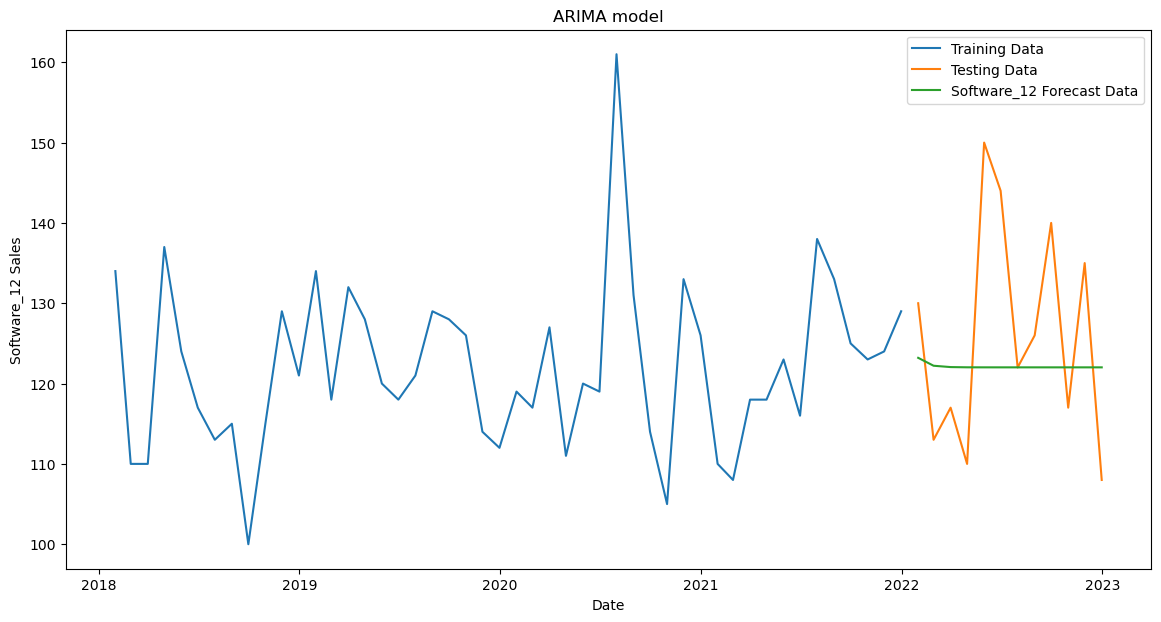

In [36]:
#Visualisation to check the forecasting

plt.figure(figsize = (14, 7))
plt.plot(train_data.index, train_data['Software_12'], label = 'Training Data')
plt.plot(test_data.index, test_data['Software_12'], label = 'Testing Data')
plt.plot(test_data.index, arima_forcast_12, label = 'Software_12 Forecast Data')
plt.xlabel('Date')
plt.ylabel('Software_12 Sales')
plt.title('ARIMA model')
plt.legend()
plt.show()

In [37]:
#Now we check what will happen in the next 12 months

forecast_12_steps = 12
future_arima_forecast_12 = arima_fit_12.get_forecast(steps = forecast_12_steps)
future_arima_df_12 = pd.DataFrame({
    'Forecast': future_arima_forecast_12.predicted_mean
})
future_arima_df_12.index = pd.date_range(start = test_data.index[-1] + pd.Timedelta(days = 30), periods = forecast_12_steps, freq = 'M')

future_arima_df_12

,Forecast
2023-01-31,123.203674
2023-02-28,122.219476
2023-03-31,122.052363
2023-04-30,122.023987
2023-05-31,122.019169
2023-06-30,122.018351
2023-07-31,122.018212
2023-08-31,122.018189
2023-09-30,122.018185
2023-10-31,122.018184


In [38]:
#We move on with SARIMAX model

#We can start building the model

sarimax_model_12 = SARIMAX(train_data['Software_12'],
                       order = (1, 1, 1),
                       seasonal_order = (1, 1, 1, 12))
sarimax_12_fit = sarimax_model_12.fit(disp = False)

/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/jasondonohoe/anaconda3/lib/python3

In [39]:
#Forecasting using SARIMAX

sarimax_forecast_12 = sarimax_12_fit.forecast(steps = len(test_data))

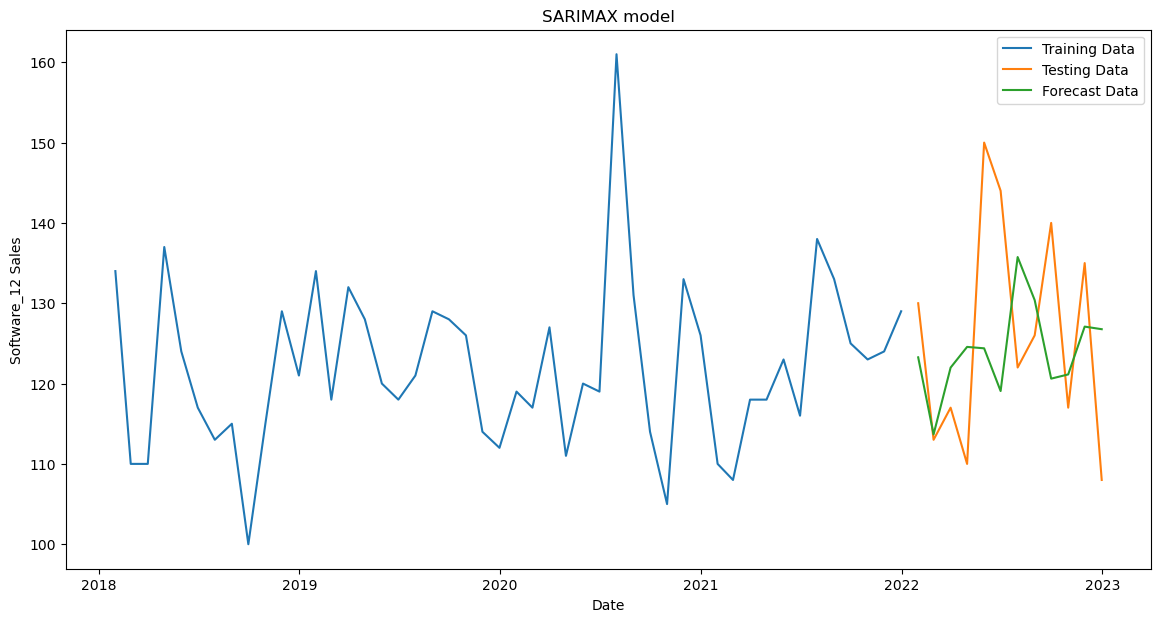

In [40]:
#Visualisation to check the forecasting

plt.figure(figsize = (14, 7))
plt.plot(train_data.index, train_data['Software_12'], label = 'Training Data')
plt.plot(test_data.index, test_data['Software_12'], label = 'Testing Data')
plt.plot(test_data.index, sarimax_forecast_12, label = 'Forecast Data')
plt.xlabel('Date')
plt.ylabel('Software_12 Sales')
plt.title('SARIMAX model')
plt.legend()
plt.show()

In [41]:
#Now we check what will happen in the next 12 months

forecast_12_steps = 12
future_sarimax_forecast_12 = sarimax_12_fit.get_forecast(steps = forecast_12_steps)
future_sarimax_12_df = pd.DataFrame({
    'Forecast': future_sarimax_forecast_12.predicted_mean
})
future_sarimax_12_df.index = pd.date_range(start = test_data.index[-1] + pd.Timedelta(days = 30), periods = forecast_12_steps, freq = 'M')

future_sarimax_12_df

,Forecast
2023-01-31,123.266108
2023-02-28,113.673323
2023-03-31,121.987419
2023-04-30,124.564122
2023-05-31,124.388909
2023-06-30,119.069564
2023-07-31,135.750061
2023-08-31,130.388248
2023-09-30,120.613741
2023-10-31,121.137893


In [42]:
#We calculate the MAPE

#ARIMA

non_zero_test_arima_12 = test_data['Software_12'] !=0
filtered_test_arima_12 = test_data['Software_12'][non_zero_test_arima_12]
filtered_forecast_arima_12 = arima_forcast_12[non_zero_test_arima_12]
arima_mape_12 = np.mean(np.abs((filtered_test_arima_12 - filtered_forecast_arima_12)/filtered_test_arima_12))*100
arima_mape_12

8.788258751852817

In [43]:
#SARIMAX

non_zero_test_sarimax_12 = test_data['Software_12'] !=0
filtered_test_sarimax_12 = test_data['Software_12'][non_zero_test_sarimax_12]
filtered_forecast_sarimax_12 = sarimax_forecast_12[non_zero_test_sarimax_12]
sarimax_mape_12 = np.mean(np.abs((filtered_test_sarimax_12 - filtered_forecast_sarimax_12)/filtered_test_sarimax_12))*100
sarimax_mape_12

9.419978836840015

# #Software_13 forecast

In [44]:
#We start with ARIMA model

#Split the data into training and test set

train_data = df_Software_13[:int(0.8*len(df_Software_13))]
test_data = df_Software_13[int(0.8*len(df_Software_13)):]

In [45]:
#Building the ARIMA model

arima_model_13 = ARIMA(train_data['Software_13'], order = (1, 1, 1))
arima_fit_13 = arima_model_13.fit()

/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [46]:
#Forecast for testing set

arima_forcast_13 = arima_fit_13.forecast(steps = len(test_data))

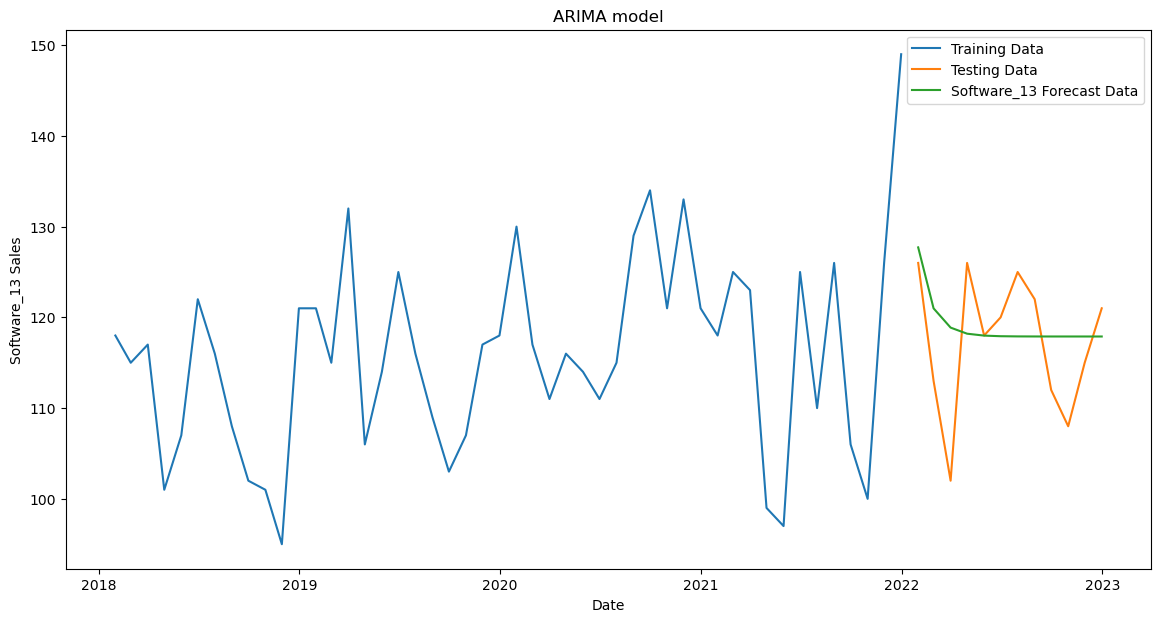

In [47]:
#Visualisation to check the forecasting

plt.figure(figsize = (14, 7))
plt.plot(train_data.index, train_data['Software_13'], label = 'Training Data')
plt.plot(test_data.index, test_data['Software_13'], label = 'Testing Data')
plt.plot(test_data.index, arima_forcast_13, label = 'Software_13 Forecast Data')
plt.xlabel('Date')
plt.ylabel('Software_13 Sales')
plt.title('ARIMA model')
plt.legend()
plt.show()

In [48]:
#Now we check what will happen in the next 12 months

forecast_12_steps = 12
future_arima_forecast_13 = arima_fit_13.get_forecast(steps = forecast_12_steps)
future_arima_df_13 = pd.DataFrame({
    'Forecast': future_arima_forecast_13.predicted_mean
})
future_arima_df_13.index = pd.date_range(start = test_data.index[-1] + pd.Timedelta(days = 30), periods = forecast_12_steps, freq = 'M')

future_arima_df_13

,Forecast
2023-01-31,127.712907
2023-02-28,120.992725
2023-03-31,118.871212
2023-04-30,118.201466
2023-05-31,117.990032
2023-06-30,117.923283
2023-07-31,117.902211
2023-08-31,117.895559
2023-09-30,117.893459
2023-10-31,117.892796


In [49]:
#We move on with SARIMAX model

#We can start building the model

sarimax_model_13 = SARIMAX(train_data['Software_13'],
                       order = (1, 1, 1),
                       seasonal_order = (1, 1, 1, 12))
sarimax_13_fit = sarimax_model_13.fit(disp = False)

/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasondonohoe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [50]:
#Forecasting using SARIMAX

sarimax_forecast_13 = sarimax_13_fit.forecast(steps = len(test_data))

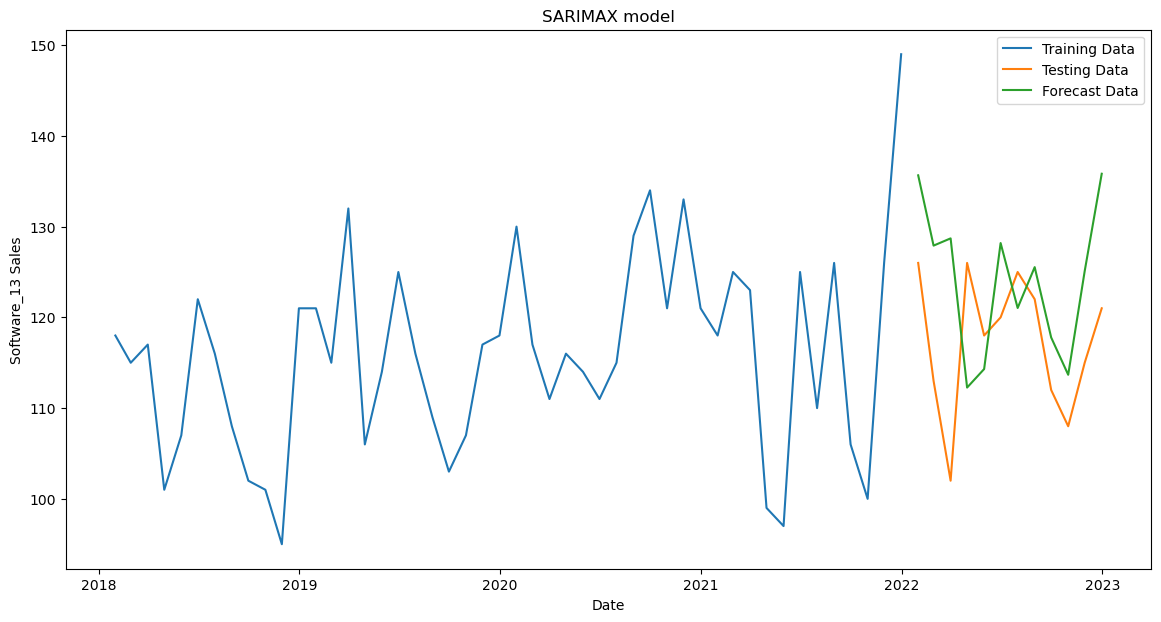

In [51]:
#Visualisation to check the forecasting

plt.figure(figsize = (14, 7))
plt.plot(train_data.index, train_data['Software_13'], label = 'Training Data')
plt.plot(test_data.index, test_data['Software_13'], label = 'Testing Data')
plt.plot(test_data.index, sarimax_forecast_13, label = 'Forecast Data')
plt.xlabel('Date')
plt.ylabel('Software_13 Sales')
plt.title('SARIMAX model')
plt.legend()
plt.show()

In [52]:
#Now we check what will happen in the next 12 months

forecast_12_steps = 12
future_sarimax_forecast_13 = sarimax_13_fit.get_forecast(steps = forecast_12_steps)
future_sarimax_13_df = pd.DataFrame({
    'Forecast': future_sarimax_forecast_13.predicted_mean
})
future_sarimax_13_df.index = pd.date_range(start = test_data.index[-1] + pd.Timedelta(days = 30), periods = forecast_12_steps, freq = 'M')

future_sarimax_13_df

,Forecast
2023-01-31,135.653268
2023-02-28,127.907955
2023-03-31,128.706655
2023-04-30,112.264025
2023-05-31,114.304422
2023-06-30,128.191983
2023-07-31,121.034927
2023-08-31,125.536093
2023-09-30,117.786269
2023-10-31,113.674107


In [53]:
#We calculate the MAPE

#ARIMA

non_zero_test_arima_13 = test_data['Software_13'] !=0
filtered_test_arima_13 = test_data['Software_13'][non_zero_test_arima_13]
filtered_forecast_arima_13 = arima_forcast_13[non_zero_test_arima_13]
arima_mape_13 = np.mean(np.abs((filtered_test_arima_13 - filtered_forecast_arima_13)/filtered_test_arima_13))*100
arima_mape_13

5.120784746471768

In [54]:
#SARIMAX

non_zero_test_sarimax_13 = test_data['Software_13'] !=0
filtered_test_sarimax_13 = test_data['Software_13'][non_zero_test_sarimax_13]
filtered_forecast_sarimax_13 = sarimax_forecast_13[non_zero_test_sarimax_13]
sarimax_mape_13 = np.mean(np.abs((filtered_test_sarimax_13 - filtered_forecast_sarimax_13)/filtered_test_sarimax_13))*100
sarimax_mape_13

8.785207281869523

# Classification and Anomaly Detection

In [72]:
#Import isolation forest

from sklearn.ensemble import IsolationForest

In [73]:
#Using dataset df_classification

df_classification

,Unnamed: 0,Issue_ID,Issue_Type,System_Component,Customer_Impact,Time_to_Resolve_hrs,Reported_By,Priority,Previous_Occurrences,Issue_Reported_Month,Resolved
0,0,8544,0,3,0,43.117583,Automated_System,High,2,Jul,True
1,1,6569,2,1,1,71.695013,Customer,Low,6,May,False
2,2,3990,2,3,2,31.621253,Automated_System,Medium,4,Mar,False
3,3,3504,2,2,1,66.329435,Automated_System,Medium,0,Sep,True
4,4,1587,2,3,2,25.168704,Automated_System,Medium,2,Jun,False
...,...,...,...,...,...,...,...,...,...,...,...
995,995,8162,1,2,2,69.735378,Automated_System,High,0,Mar,False
996,996,7241,0,3,0,32.881160,Customer,Medium,1,Jan,False
997,997,9399,2,0,1,68.118630,Customer,Medium,7,Feb,False
998,998,6633,2,2,2,48.892633,Customer,Urgent,8,May,True


In [74]:
df_class = df_classification[['Issue_Type', 'System_Component', 'Customer_Impact', 'Priority']]

In [75]:
df_class.head()

,Issue_Type,System_Component,Customer_Impact,Priority
0,0,3,0,High
1,2,1,1,Low
2,2,3,2,Medium
3,2,2,1,Medium
4,2,3,2,Medium


In [76]:
#We need to encode the categorical variables

from sklearn.preprocessing import LabelEncoder

In [77]:
label_encoder_class = LabelEncoder()
df_class['Issue_Type'] = label_encoder_class.fit_transform(df_class['Issue_Type'])
df_class['System_Component'] = label_encoder_class.fit_transform(df_class['System_Component'])
df_class['Customer_Impact'] = label_encoder_class.fit_transform(df_class['Customer_Impact'])
df_class['Priority'] = label_encoder_class.fit_transform(df_class['Priority'])

df_class.head()

/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_66299/3619405341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['Issue_Type'] = label_encoder_class.fit_transform(df_class['Issue_Type'])
/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_66299/3619405341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['System_Component'] = label_encoder_class.fit_transform(df_class['System_Component'])
/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_66299/3619405341.py

,Issue_Type,System_Component,Customer_Impact,Priority
0,0,3,0,0
1,2,1,1,1
2,2,3,2,2
3,2,2,1,2
4,2,3,2,2


In [78]:
#We define X and Y

x = df_class.iloc[:, :-1].values
y = df_class.iloc[:, -1].values

In [79]:
#Splitting into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [80]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [81]:
#We are ready to prepare the data fro Random Forest Classifer

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [82]:
#Compare test and training results and evaluate the model

y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)),1))

[[2 0]
 [3 3]
 [1 1]
 [0 2]
 [1 1]
 [2 2]
 [2 3]
 [2 0]
 [3 1]
 [3 3]
 [2 1]
 [2 3]
 [2 1]
 [2 1]
 [3 2]
 [1 3]
 [1 0]
 [2 0]
 [0 0]
 [0 1]
 [3 3]
 [3 3]
 [2 3]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 0]
 [2 1]
 [0 1]
 [0 1]
 [1 1]
 [2 0]
 [2 0]
 [1 0]
 [3 0]
 [2 0]
 [3 3]
 [3 1]
 [2 2]
 [3 2]
 [0 0]
 [2 1]
 [1 1]
 [2 1]
 [1 0]
 [1 3]
 [3 2]
 [2 3]
 [2 2]
 [1 2]
 [1 2]
 [2 1]
 [0 0]
 [2 3]
 [2 1]
 [3 1]
 [1 3]
 [3 2]
 [3 2]
 [1 2]
 [3 0]
 [2 3]
 [3 0]
 [3 3]
 [1 3]
 [1 3]
 [1 2]
 [2 1]
 [0 0]
 [2 1]
 [0 2]
 [0 1]
 [2 1]
 [0 2]
 [3 2]
 [3 0]
 [2 2]
 [2 1]
 [1 3]
 [3 2]
 [2 3]
 [2 3]
 [3 1]
 [2 0]
 [2 0]
 [0 2]
 [0 1]
 [2 1]
 [3 2]
 [3 0]
 [1 0]
 [1 0]
 [2 2]
 [1 1]
 [1 0]
 [0 0]
 [1 3]
 [1 2]
 [1 1]
 [3 3]
 [1 0]
 [2 0]
 [2 3]
 [0 2]
 [1 1]
 [1 2]
 [2 1]
 [1 3]
 [3 1]
 [1 3]
 [3 0]
 [3 1]
 [0 2]
 [2 3]
 [1 1]
 [3 0]
 [2 1]
 [3 0]
 [0 2]
 [2 0]
 [1 1]
 [2 1]
 [3 1]
 [0 3]
 [1 3]
 [2 0]
 [2 0]
 [1 2]
 [2 2]
 [3 0]
 [3 2]
 [2 1]
 [2 2]
 [1 0]
 [2 1]
 [2 0]
 [2 2]
 [3 1]
 [0 0]
 [2 2]
 [1 3]

Text(0.5, 1.0, 'Confusion Matrix')

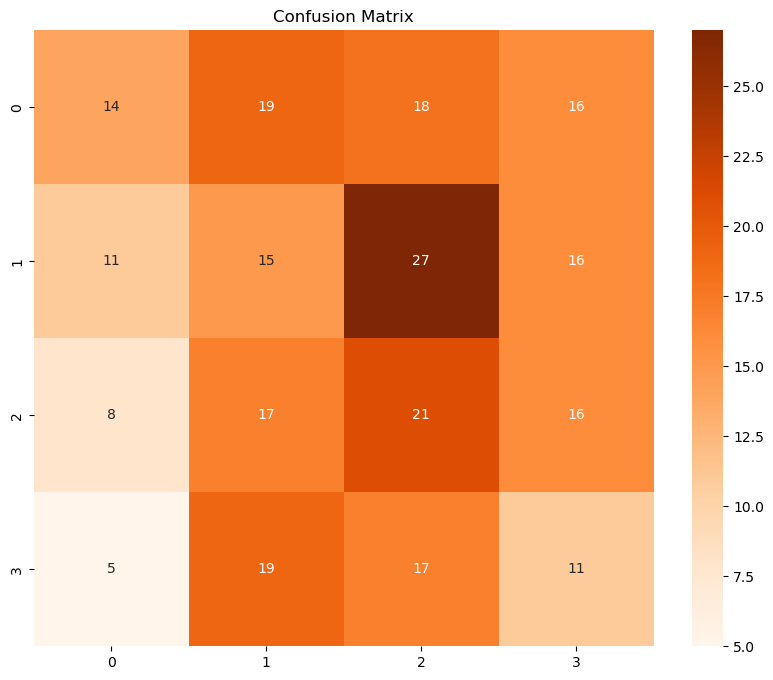

In [83]:
#Confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Oranges')
plt.title('Confusion Matrix')

In [84]:
#Evaluating accuracy

accuracy_score(y_test, y_pred)

0.244

In [85]:
df_classification.head()

,Unnamed: 0,Issue_ID,Issue_Type,System_Component,Customer_Impact,Time_to_Resolve_hrs,Reported_By,Priority,Previous_Occurrences,Issue_Reported_Month,Resolved
0,0,8544,0,3,0,43.117583,Automated_System,High,2,Jul,True
1,1,6569,2,1,1,71.695013,Customer,Low,6,May,False
2,2,3990,2,3,2,31.621253,Automated_System,Medium,4,Mar,False
3,3,3504,2,2,1,66.329435,Automated_System,Medium,0,Sep,True
4,4,1587,2,3,2,25.168704,Automated_System,Medium,2,Jun,False


In [86]:
#We need to encode the categorical variables

from sklearn.preprocessing import LabelEncoder

In [87]:
label_encoder = LabelEncoder()
df_classification['Issue_Type'] = label_encoder.fit_transform(df_classification['Issue_Type'])
df_classification['System_Component'] = label_encoder.fit_transform(df_classification['System_Component'])
df_classification['Customer_Impact'] = label_encoder.fit_transform(df_classification['Customer_Impact'])
df_classification.head()

,Unnamed: 0,Issue_ID,Issue_Type,System_Component,Customer_Impact,Time_to_Resolve_hrs,Reported_By,Priority,Previous_Occurrences,Issue_Reported_Month,Resolved
0,0,8544,0,3,0,43.117583,Automated_System,High,2,Jul,True
1,1,6569,2,1,1,71.695013,Customer,Low,6,May,False
2,2,3990,2,3,2,31.621253,Automated_System,Medium,4,Mar,False
3,3,3504,2,2,1,66.329435,Automated_System,Medium,0,Sep,True
4,4,1587,2,3,2,25.168704,Automated_System,Medium,2,Jun,False


In [88]:
#We select the variables that are relevant to detect anomalies

X_anomaly = df_classification[['Issue_Type', 'System_Component', 'Customer_Impact']]

In [89]:
#Train the anomaly detection model --> Isolation Forest

anomaly_detector = IsolationForest(contamination = 0.10, random_state = 0)
anomaly_detector.fit(X_anomaly)

IsolationForest(contamination=0.1, random_state=0)

In [90]:
#Predict the anomalies

df_classification['Anomaly'] = anomaly_detector.predict(X_anomaly)

In [91]:
#Display the results --> -1 there is an anomaly, +1 no anomaly

anomaly_results = df_classification[df_classification['Anomaly'] == -1]
anomaly_results

,Unnamed: 0,Issue_ID,Issue_Type,System_Component,Customer_Impact,Time_to_Resolve_hrs,Reported_By,Priority,Previous_Occurrences,Issue_Reported_Month,Resolved,Anomaly
0,0,8544,0,3,0,43.117583,Automated_System,High,2,Jul,True,-1
14,14,8096,1,1,2,9.105996,Automated_System,High,0,Sep,False,-1
19,19,2674,0,3,2,9.018558,Customer,Urgent,9,Apr,False,-1
30,30,6063,3,0,0,14.076086,Automated_System,Low,9,Mar,False,-1
32,32,9831,1,1,2,28.514479,Customer,Medium,8,Mar,False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,4922,0,3,0,7.031757,Customer,Medium,6,Aug,True,-1
930,930,2481,3,0,0,2.402498,Customer,Urgent,3,Nov,False,-1
977,977,8644,3,0,0,42.948450,Automated_System,High,9,Oct,False,-1
987,987,6788,2,0,0,18.541076,Automated_System,Urgent,9,Jan,False,-1


In [92]:
anomaly_results.shape

(94, 12)

# Recommendation System

In [93]:
#Using dataset df_retail_list

df_retail_list

,InvoiceNo,ItemCode,Most popular item of the day,Quantity,Date,UnitPrice,CustomerID
0,1.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2018,2.55,43009.0
1,2.0,71053,WHITE METAL LANTERN,6.0,02/12/2018,3.39,79874.0
2,3.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,03/12/2018,2.75,45061.0
3,4.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,04/12/2018,3.39,47110.0
4,5.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,05/12/2018,3.39,77834.0
...,...,...,...,...,...,...,...
1623,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1626,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df_retail_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   InvoiceNo                     1000 non-null   float64
 1   ItemCode                      1000 non-null   object 
 2   Most popular item of the day  999 non-null    object 
 3   Quantity                      1000 non-null   float64
 4   Date                          1000 non-null   object 
 5   UnitPrice                     1000 non-null   float64
 6   CustomerID                    1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 89.2+ KB


In [95]:
#Checking for missing values again

df_retail_list.isnull().sum()

InvoiceNo                       628
ItemCode                        628
Most popular item of the day    629
Quantity                        628
Date                            628
UnitPrice                       628
CustomerID                      628
dtype: int64

In [96]:
#We drop the rows where the customer ID is missing --> It makes noise in our future matrix construction

df_retail_list.dropna(subset=['CustomerID'], inplace = True)

In [97]:
#We can start with the recommendation system
#We convert the customer ID into string to facilitate the algroithm

df_retail_list['CustomerID'] = df_retail_list['CustomerID'].astype(str)

In [98]:
#We need to identify the values that are greater than 0 (a return will show up as a negative number)
#Apply to price and units

df_retail_list = df_retail_list[(df_retail_list['Quantity']>0) & (df_retail_list['UnitPrice']>0)]

In [99]:
#Now we will create the User_item matrix --> Understanding the behaviour of the user regarding the items

user_item_matrix = df_retail_list.pivot_table(index = 'CustomerID', columns = 'ItemCode', values = 'Quantity', aggfunc = 'sum').fillna(0)
user_item_matrix.head()

ItemCode,10002,10125,10133,15056BL,15056N,16014,16016,16237,16238,16258A,...,90059E,90129F,90185C,90199C,90200A,90200B,90200C,90200D,90210B,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
10563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10745.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10807.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11068.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
#We create the similarity matrix

user_similarity = cosine_similarity(user_item_matrix)

In [101]:
#Display the similarities in a dataframe to make it easier to read

user_similarity_df = pd.DataFrame(user_similarity, index = user_item_matrix.index, columns = user_item_matrix.index)

In [102]:
user_similarity_df.head()

CustomerID,10563.0,10666.0,10745.0,10807.0,11068.0,11442.0,11623.0,11851.0,12345.0,12769.0,...,99039.0,99059.0,99124.0,99195.0,99208.0,99295.0,99451.0,99580.0,99612.0,99866.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
10563.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10666.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10745.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10807.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.041631,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11068.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
#Rating prediction using the matrix user_item

def predict_ratings_user_based(user_item_matrix, user_similarity):
    mean_user_rating = user_item_matrix.mean(axis = 1).values
    rating_diff = (user_item_matrix.values - mean_user_rating[:, np.newaxis])
    pred = mean_user_rating[:, np.newaxis] + user_similarity.dot(rating_diff)/np.array([np.abs(user_similarity).sum(axis = 1)]).T
    return pred

In [104]:
#Predicted ratings

user_predicted_ratings = predict_ratings_user_based(user_item_matrix, user_similarity)
user_predicted_ratings

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01962457,  0.01962457,  0.01962457, ...,  0.01962457,
         0.01962457,  0.01962457],
       [ 0.01138035,  0.01138035,  0.01138035, ...,  0.01138035,
         0.01138035,  0.01138035],
       ...,
       [-0.02167458, -0.02167458, -0.02167458, ..., -0.02167458,
        -0.02167458, -0.02167458],
       [-0.0016948 , -0.0016948 , -0.0016948 , ..., -0.0016948 ,
        -0.0016948 , -0.0016948 ],
       [-0.00838519, -0.00838519, -0.00838519, ..., -0.00838519,
        -0.00838519, -0.00838519]])

In [105]:
#Checking the performance of the algorithm

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

print('User-user collaborative error:', rmse(user_predicted_ratings, user_item_matrix.values))

User-user collaborative error: 17.370611329377493


In [106]:
#We create an item similarity matrix

item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index = user_item_matrix.columns, columns = user_item_matrix.columns)

In [107]:
#Rating for the item collaboration

def predict_ratings_item_based(user_item_matrix, item_similarity):
    pred = user_item_matrix.values.dot(item_similarity)/np.array([np.abs(item_similarity).sum(axis=1)])
    return pred

#Predict the ratings

item_predicted_ratings = predict_ratings_item_based(user_item_matrix, item_similarity)

#We print the accuracy
print('Item-item collaborative error:', rmse(item_predicted_ratings, user_item_matrix.values))

Item-item collaborative error: 17.38133841207562


In both cases, the errors seem very high. The rmse must be close to zero. The closer to zero, the better. So, we will apply the SVD

In [108]:
from scipy.sparse.linalg import svds

In [109]:
#Normalise the data to have the same unit of measurement 

user_ratings_mean = np.mean(user_item_matrix.values, axis = 1)
ratings_demeaned = user_item_matrix.values - user_ratings_mean.reshape(-1, 1)

In [110]:
#Singular Value Decomposition (SVD)

U, sigma, Vt = svds(ratings_demeaned, k = 50)
sigma = np.diag(sigma)

In [111]:
#Rating prediction

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
predicted_ratings_df = pd.DataFrame(all_user_predicted_ratings, columns = user_item_matrix.columns)

In [112]:
#Evaluation of the model after SVD

print('SVD collaborative filtering', rmse(predicted_ratings_df.values, user_item_matrix.values))

SVD collaborative filtering 8.890331207685191


In [113]:
#Now, with these results, we can move on to the recommendations. Let's say that we want to recommend 3 items to 3 random customers

def recommended_items(user_id, user_item_matrix, predicted_ratings_df, num_recommendations = 3):
    user_idx = user_item_matrix.index.get_loc(user_id) #sorting the user predicted ratings
    sorted_user_ratings = predicted_ratings_df.iloc[user_idx].sort_values(ascending = False)
    user_data = user_item_matrix.loc[user_id] #appending or merging the user data with the sorted ratings
    user_full = (user_data[user_data > 0]).sort_values(ascending = False)
    recommendations = sorted_user_ratings[~sorted_user_ratings.index.isin(user_full.index)]
    return recommendations.head(num_recommendations) #Recommendation of items that the user did not buy yet

In [114]:
def normalize_ratings(predicted_ratings):
    min_rating = predicted_ratings.min()
    max_rating = predicted_ratings.max()
    probabilities = (predicted_ratings - min_rating) / (max_rating - min_rating)
    return probabilities

# Customer 1

In [127]:
random_user_index = np.random.choice(user_item_matrix.index) #Select a random user

customer_id = random_user_index
customer_id

'62639.0'

In [128]:
recommendations = recommended_items(random_user_index, user_item_matrix, predicted_ratings_df, num_recommendations = 3)

In [129]:
#Normalise the predicted ratings to get probabilities
recommendation_probabilities = normalize_ratings(recommendations)

# Display the recommendations and their probabilities
print("Recommendations for customer ID:", customer_id)
print(recommendation_probabilities)

Recommendations for customer ID: 62639.0
ItemCode
22174    1.000
84678    0.925
22963    0.000
Name: 462, dtype: float64


In [130]:
#We convert the stock codes into strings

df_retail_list['ItemCode'] = df_retail_list['ItemCode'].astype(str)

/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_66299/969637083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail_list['ItemCode'] = df_retail_list['ItemCode'].astype(str)


In [131]:
item_codes = ['22174', '22963', '84678']

In [132]:
#We display the results in a dataframe

filtered_data = df_retail_list[df_retail_list['ItemCode'].isin(['22174', '22963', '84678'])]
filtered_data

,InvoiceNo,ItemCode,Most popular item of the day,Quantity,Date,UnitPrice,CustomerID
215,216.0,22963,JAM JAR WITH GREEN LID,48.0,04/07/2019,0.72,45453.0
232,233.0,22174,PHOTO CUBE,48.0,21/07/2019,1.48,51633.0
733,734.0,84678,CLASSICAL ROSE SMALL VASE,48.0,03/12/2020,1.25,93628.0


In [133]:
#We create a dataframe with the probability of buying the recommended items

prob_df = pd.DataFrame(list(recommendation_probabilities.items()), columns = ['ItemCode', 'Probability']) #Creating the likelihood of buying the recommendations

In [134]:
prob_df["ItemCode"] = prob_df["ItemCode"].astype(str)

In [135]:
final_result_df = pd.merge(filtered_data[['ItemCode', 'Most popular item of the day']].drop_duplicates(), prob_df, on = 'ItemCode')
final_result_df

,ItemCode,Most popular item of the day,Probability
0,22963,JAM JAR WITH GREEN LID,0.000
1,22174,PHOTO CUBE,1.000
2,84678,CLASSICAL ROSE SMALL VASE,0.925


# Customer 2 

In [136]:
random_user_index = np.random.choice(user_item_matrix.index) #Select a random user

customer_id_2 = random_user_index
customer_id_2

'19242.0'

In [137]:
recommendations = recommended_items(random_user_index, user_item_matrix, predicted_ratings_df, num_recommendations = 3)

In [138]:
#Normalise the predicted ratings to get probabilities
recommendation_probabilities = normalize_ratings(recommendations)

# Display the recommendations and their probabilities
print("Recommendations for customer ID:", customer_id_2)
print(recommendation_probabilities)

Recommendations for customer ID: 19242.0
ItemCode
22174    1.000000
84678    0.961957
22963    0.000000
Name: 62, dtype: float64


In [139]:
#We convert the stock codes into strings

df_retail_list['ItemCode'] = df_retail_list['ItemCode'].astype(str)

/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_66299/969637083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail_list['ItemCode'] = df_retail_list['ItemCode'].astype(str)


In [140]:
item_codes = ['22174', '22963', '84678']

In [145]:
#We display the results in a dataframe

filtered_data = df_retail_list[df_retail_list['ItemCode'].isin(['22174', '22963', '84678'])]
filtered_data

,InvoiceNo,ItemCode,Most popular item of the day,Quantity,Date,UnitPrice,CustomerID
215,216.0,22963,JAM JAR WITH GREEN LID,48.0,04/07/2019,0.72,45453.0
232,233.0,22174,PHOTO CUBE,48.0,21/07/2019,1.48,51633.0
733,734.0,84678,CLASSICAL ROSE SMALL VASE,48.0,03/12/2020,1.25,93628.0


In [142]:
#We create a dataframe with the probability of buying the recommended items

prob_df = pd.DataFrame(list(recommendation_probabilities.items()), columns = ['ItemCode', 'Probability']) #Creating the likelihood of buying the recommendations

In [143]:
prob_df["ItemCode"] = prob_df["ItemCode"].astype(str)

In [144]:
final_result_df = pd.merge(filtered_data[['ItemCode', 'Most popular item of the day']].drop_duplicates(), prob_df, on = 'ItemCode')
final_result_df

,ItemCode,Most popular item of the day,Probability
0,22963,JAM JAR WITH GREEN LID,0.000000
1,22174,PHOTO CUBE,1.000000
2,84678,CLASSICAL ROSE SMALL VASE,0.961957


# Customer 3

In [146]:
random_user_index = np.random.choice(user_item_matrix.index) #Select a random user

customer_id_3 = random_user_index
customer_id_3

'51313.0'

In [147]:
recommendations = recommended_items(random_user_index, user_item_matrix, predicted_ratings_df, num_recommendations = 3)

In [148]:
#Normalise the predicted ratings to get probabilities
recommendation_probabilities = normalize_ratings(recommendations)

# Display the recommendations and their probabilities
print("Recommendations for customer ID:", customer_id_3)
print(recommendation_probabilities)

Recommendations for customer ID: 51313.0
ItemCode
22632    1.000000e+00
22962    2.611411e-14
22059    0.000000e+00
Name: 365, dtype: float64


In [151]:
#We convert the stock codes into strings

df_retail_list['ItemCode'] = df_retail_list['ItemCode'].astype(str)

/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_66299/969637083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail_list['ItemCode'] = df_retail_list['ItemCode'].astype(str)


In [152]:
item_codes = ['22632', '22962', '22059']

In [153]:
#We display the results in a dataframe

filtered_data = df_retail_list[df_retail_list['ItemCode'].isin(['22632', '22962', '22059'])]
filtered_data

,InvoiceNo,ItemCode,Most popular item of the day,Quantity,Date,UnitPrice,CustomerID
8,9.0,22632,HAND WARMER RED POLKA DOT,6.0,09/12/2018,1.85,90129.0
47,48.0,22632,HAND WARMER RED POLKA DOT,6.0,17/01/2019,1.85,34900.0
84,85.0,22632,HAND WARMER RED POLKA DOT,6.0,23/02/2019,1.85,22672.0
214,215.0,22962,JAM JAR WITH PINK LID,48.0,03/07/2019,0.72,70024.0
257,258.0,22632,HAND WARMER RED RETROSPOT,96.0,15/08/2019,1.85,45538.0
304,305.0,22632,HAND WARMER RED RETROSPOT,12.0,01/10/2019,2.10,53809.0
315,316.0,22632,HAND WARMER RED POLKA DOT,6.0,12/10/2019,1.85,94797.0
433,434.0,22632,HAND WARMER RED POLKA DOT,6.0,07/02/2020,1.85,37705.0
664,665.0,22632,HAND WARMER RED RETROSPOT,3.0,25/09/2020,2.10,70973.0
704,705.0,22632,HAND WARMER RED RETROSPOT,12.0,04/11/2020,2.10,81281.0


In [154]:
#We create a dataframe with the probability of buying the recommended items

prob_df = pd.DataFrame(list(recommendation_probabilities.items()), columns = ['ItemCode', 'Probability']) #Creating the likelihood of buying the recommendations

In [155]:
prob_df["ItemCode"] = prob_df["ItemCode"].astype(str)

In [156]:
final_result_df = pd.merge(filtered_data[['ItemCode', 'Most popular item of the day']].drop_duplicates(), prob_df, on = 'ItemCode')
final_result_df

,ItemCode,Most popular item of the day,Probability
0,22632,HAND WARMER RED POLKA DOT,1.000000e+00
1,22632,HAND WARMER RED RETROSPOT,1.000000e+00
2,22962,JAM JAR WITH PINK LID,2.611411e-14
3,22059,CERAMIC STRAWBERRY DESIGN MUG,0.000000e+00
